# Post-Modeling Analysis

## Get performance tables

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import util
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim


In [2]:
# ALWAYS choose devise first.
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [3]:
import pickle
# performance_continuous
# performance_handcrafted

# performance_continuous is the result from CNN models
with open('outputs/performance_continuous_bw.pickle', 'rb') as h:
    performance_continuous_bw = pickle.load(h) # pure cnn models with bw 

# with open('outputs/performance_continuous.pickle', 'rb') as h:
#     performance_continuous_bw = pickle.load(h) # pure cnn models with bw 

with open('outputs/performance_continuous_rgb.pickle', 'rb') as h:
    performance_continuous_rgb = pickle.load(h) # pure cnn models with bw 

with open('outputs/performance_continuous_merge.pickle', 'rb') as h:
    performance_continuous_merge = pickle.load(h) # pure cnn models with bw 
    
with open('outputs/performance_handcrafted.pickle', 'rb') as h:
    performance_handcrafted = pickle.load(h) # BE and NHTS models

with open('outputs/performance_cnn_combined.pickle', 'rb') as h:
    performance_cnn_combined = pickle.load(h) # CNN + BE + NHTS models

In [4]:
print(performance_continuous_bw)
print()
print(performance_handcrafted)
print()
print(performance_cnn_combined)

{'HHVEHCNT_mean_norm': {'mse_train_list': [11898.38228225708, 9711.63095831871, 9578.2965362072, 9589.327257871628, 9508.170175552368, 9469.077628850937, 9395.341342687607, 9301.70983672142, 9011.907038092613, 8666.707360744476, 8410.534101724625, 7379.510512948036, 6268.5199201107025, 4787.690734863281, 5367.341074347496, 3717.700643837452, 2931.1027511954308, 2073.1965370476246, 1672.522996366024, 1400.4880905151367, 1353.2255601137877, 1192.7803065627813, 1133.133276924491, 1044.9474420398474, 932.1321491152048], 'mse_test_list': [2384.304928779602, 2316.4153337478638, 2368.3009266853333, 2301.872807741165, 2289.8967564105988, 2314.119589328766, 2242.831313610077, 2325.0925958156586, 2266.5706157684326, 2294.3988919258118, 2313.4309709072113, 2405.1272213459015, 2603.4053802490234, 2644.798105955124, 2888.5600566864014, 2693.5774445533752, 2740.904712677002, 2761.8897676467896, 2730.8368265628815, 2797.0026314258575, 2771.0613906383514, 2869.249105453491, 2976.7498254776, 2756.75571

In [5]:
output_var_list=['HHVEHCNT_mean_norm', 'HHVEHCNT_P_CAP_mean_norm', 'TRPTRANS_1_mean_norm', 'TRPTRANS_2_mean_norm', 'TRPTRANS_3_mean_norm']
input_structure_continuous_list = ['ResNet18 (BW)', 'ResNet18 (RGB)', 'ResNet18 (Merge)']

input_structure_handcrafted_list = ['BE linear', 'BE quadratic', 'NHTS linear', 'NHTS quadratic', 'BE and NHTS linear', 
                                    'BE and NHTS quadratic']
input_structure_cnn_combined_list = ['CNN and NHTS linear', 'CNN BE NHTS linear']


In [6]:
train_r2 = {}
test_r2 = {}

for output_var in output_var_list:
    test_r2[output_var] = {}
    train_r2[output_var] = {}
    
    for input_structure_continuous in input_structure_continuous_list:
        if input_structure_continuous == 'ResNet18 (BW)':
            max_r_square_test = np.max(performance_continuous_bw[output_var]['r_square_test_list'])
            idx = performance_continuous_bw[output_var]['r_square_test_list'].index(max_r_square_test)        
            test_r2[output_var][input_structure_continuous]=np.max(performance_continuous_bw[output_var]['r_square_test_list'])
            train_r2[output_var][input_structure_continuous]=performance_continuous_bw[output_var]['r_square_train_list'][idx]

        elif input_structure_continuous == 'ResNet18 (RGB)':
            max_r_square_test = np.max(performance_continuous_rgb[output_var]['r_square_test_list'])
            idx = performance_continuous_rgb[output_var]['r_square_test_list'].index(max_r_square_test)        
            test_r2[output_var][input_structure_continuous]=np.max(performance_continuous_rgb[output_var]['r_square_test_list'])
            train_r2[output_var][input_structure_continuous]=performance_continuous_rgb[output_var]['r_square_train_list'][idx]
            
        elif input_structure_continuous == 'ResNet18 (Merge)':
            max_r_square_test = np.max(performance_continuous_merge[output_var]['r_square_test_list'])
            idx = performance_continuous_merge[output_var]['r_square_test_list'].index(max_r_square_test)        
            test_r2[output_var][input_structure_continuous]=np.max(performance_continuous_merge[output_var]['r_square_test_list'])
            train_r2[output_var][input_structure_continuous]=performance_continuous_merge[output_var]['r_square_train_list'][idx]

    for input_structure_handcrafted in input_structure_handcrafted_list:
        test_r2[output_var][input_structure_handcrafted]=performance_handcrafted[output_var][input_structure_handcrafted]['test_r2']
        train_r2[output_var][input_structure_handcrafted]=performance_handcrafted[output_var][input_structure_handcrafted]['train_r2']
        
    for input_structure_cnn_combined in input_structure_cnn_combined_list:
        test_r2[output_var][input_structure_cnn_combined]=performance_cnn_combined[output_var][input_structure_cnn_combined]['test_r2']
        train_r2[output_var][input_structure_cnn_combined]=performance_cnn_combined[output_var][input_structure_cnn_combined]['train_r2']


In [7]:
col_names = ['Automobiles', 'Automobile_per_capita', 'Walk/Cycling Mode Share', 'Automobile Mode Share', 'PT Mode Share']

In [8]:
test_r2_table = pd.DataFrame(test_r2)
test_r2_table.columns = col_names
test_r2_table

,Automobiles,Automobile_per_capita,Walk/Cycling Mode Share,Automobile Mode Share,PT Mode Share
ResNet18 (BW),0.120262,0.106462,0.309224,0.403787,0.172744
ResNet18 (RGB),0.127812,0.102853,0.294062,0.378581,0.193541
ResNet18 (Merge),0.135988,0.116866,0.310763,0.410987,0.208126
BE linear,0.084195,0.087349,0.178908,0.222090,0.110670
BE quadratic,0.094053,0.094257,0.223722,0.275076,0.126030
NHTS linear,0.295762,0.282176,0.211402,0.257323,0.113943
NHTS quadratic,0.242574,0.297114,0.151523,0.295780,0.048252
BE and NHTS linear,0.301641,0.287128,0.231963,0.285146,0.134433
BE and NHTS quadratic,-0.545154,-0.287031,0.247812,0.220622,0.071851
CNN and NHTS linear,0.339674,0.340317,0.336230,0.415407,0.188260


In [9]:
train_r2_table = pd.DataFrame(train_r2)
train_r2_table.columns = col_names
train_r2_table

,Automobiles,Automobile_per_capita,Walk/Cycling Mode Share,Automobile Mode Share,PT Mode Share
ResNet18 (BW),0.121968,0.117266,0.260741,0.353001,0.192422
ResNet18 (RGB),0.153213,0.077327,0.304522,0.420411,0.268042
ResNet18 (Merge),0.143811,0.106519,0.297904,0.337050,0.238163
BE linear,0.077908,0.084790,0.155690,0.199716,0.119360
BE quadratic,0.092613,0.094117,0.182661,0.237287,0.146784
NHTS linear,0.280377,0.280621,0.180766,0.225326,0.123889
NHTS quadratic,0.236005,0.300796,0.127916,0.266519,0.093460
BE and NHTS linear,0.286523,0.286881,0.206624,0.260588,0.149271
BE and NHTS quadratic,-0.522974,-0.206964,0.207930,0.199767,0.140141
CNN and NHTS linear,0.346942,0.337764,0.357623,0.411267,0.281789


In [10]:
for i in range(test_r2_table.shape[0]):
    for j in range(test_r2_table.shape[1]):
        test_r2_table.iloc[i,j] = str(np.around(test_r2_table.iloc[i,j], decimals=4)*100)[:4]+'%'
        
test_r2_table.to_csv("outputs/test_r2_table.csv")
test_r2_table

,Automobiles,Automobile_per_capita,Walk/Cycling Mode Share,Automobile Mode Share,PT Mode Share
ResNet18 (BW),12.0%,10.6%,30.9%,40.3%,17.2%
ResNet18 (RGB),12.7%,10.2%,29.4%,37.8%,19.3%
ResNet18 (Merge),13.6%,11.6%,31.0%,41.0%,20.8%
BE linear,8.42%,8.73%,17.8%,22.2%,11.0%
BE quadratic,9.41%,9.43%,22.3%,27.5%,12.6%
NHTS linear,29.5%,28.2%,21.1%,25.7%,11.3%
NHTS quadratic,24.2%,29.7%,15.1%,29.5%,4.83%
BE and NHTS linear,30.1%,28.7%,23.2%,28.5%,13.4%
BE and NHTS quadratic,-54.%,-28.%,24.7%,22.0%,7.19%
CNN and NHTS linear,33.9%,34.0%,33.6%,41.5%,18.8%


In [11]:
for i in range(train_r2_table.shape[0]):
    for j in range(train_r2_table.shape[1]):
        train_r2_table.iloc[i,j] = str(np.around(train_r2_table.iloc[i,j], decimals=4)*100)[:4]+'%'
   
train_r2_table.to_csv("outputs/train_r2_table.csv")
train_r2_table

,Automobiles,Automobile_per_capita,Walk/Cycling Mode Share,Automobile Mode Share,PT Mode Share
ResNet18 (BW),12.2%,11.7%,26.0%,35.3%,19.2%
ResNet18 (RGB),15.3%,7.72%,30.4%,42.0%,26.8%
ResNet18 (Merge),14.3%,10.6%,29.7%,33.7%,23.8%
BE linear,7.79%,8.48%,15.5%,19.9%,11.9%
BE quadratic,9.26%,9.41%,18.2%,23.7%,14.6%
NHTS linear,28.0%,28.0%,18.0%,22.5%,12.3%
NHTS quadratic,23.5%,30.0%,12.7%,26.6%,9.35%
BE and NHTS linear,28.6%,28.6%,20.6%,26.0%,14.9%
BE and NHTS quadratic,-52.%,-20.%,20.7%,19.9%,14.0%
CNN and NHTS linear,34.6%,33.7%,35.7%,41.1%,28.1%


In [12]:
test_r2_table.shape

(11, 5)

## Visualize prediction

#### Resnet prediction

In [22]:
### 
size = 12000
image_array_ = np.load("data_process/image_array_bw_tract_large.npy", mmap_mode='r')
image_array = image_array_[:size,]
image_array_torch = torch.from_numpy(image_array.astype("float32"))
image_array_torch_norm = image_array_torch/255

### 
output_var = 'TRPTRANS_1_mean_norm' # walking and cycling mode share.
# output_var = 'TRPTRANS_2_mean_norm' # walking and cycling mode share.
# output_var = 'HHVEHCNT_mean_norm' # walking and cycling mode share.
image_type='bw'
df_ = pd.read_csv("data_process/df_merged_tract_large.csv")
df = df_.iloc[:size,]
y = df[output_var].values.astype("float32")
y_torch = torch.from_numpy(y)

In [23]:
# initialize model
num_categories = 1
model = models.resnet18()
model.conv1 = nn.Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_categories) # if output_type == continuous, then num_categories = 1.
# load the saved model
model_name = 'resnet18'
PATH = './models/'+model_name+'_'+output_var+'_'+image_type+'.pth'
# PATH = './models/'+model_name+'_'+output_var+'.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [24]:
model.to(device)

ResNet(
  (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
# compute prediction. Note since our model's training and testing performances are similar, I combine them for analysis.
y_pred = []

all_ds = TensorDataset(image_array_torch_norm, y_torch)
batch_size = 100
all_dl = DataLoader(all_ds, batch_size, shuffle = False) # again. No shuffle for prediction!

for images,labels in all_dl:
    # 
    images=images.to(device)
    labels=labels.to(device)
    # 
    outputs = model(images)
    y_pred.append(outputs.view(-1).cpu().detach().numpy())

#     print(outputs.size())

In [26]:
y_pred_np = np.array(y_pred).reshape(-1)

In [27]:
np.corrcoef(y, y_pred_np) # Good. 

array([[1.        , 0.31083659],
       [0.31083659, 1.        ]])

In [28]:
np.corrcoef(y[(y != np.min(y)) & (y != np.max(y))], y_pred_np[(y != np.min(y)) & (y != np.max(y))])

array([[1.        , 0.31607995],
       [0.31607995, 1.        ]])

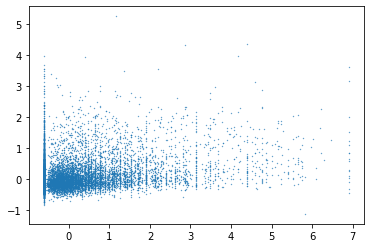

In [29]:
plt.scatter(y, y_pred_np, s = 0.1)
# Finding 1: Truncated on one side (walk/cycling share) - the zeros cannot be predicted well. 
# Finding 2: Truncated on two sides (Car mode share). The numbers on the two sides cannot be predicted well. 
# Finding 3: Some y (HH Vehicle) has clear concentration around integers. It means that the data preprocessing is still not perfect. 
# These findings should lead to further innovations in modeling. May not be in this paper. 

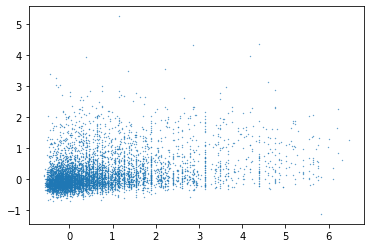

In [30]:
plt.scatter(y[(y != np.min(y)) & (y != np.max(y))], y_pred_np[(y != np.min(y)) & (y != np.max(y))], s = 0.1) # Good. Around .4 correlation, similar to R2 performance

#### NHTS prediction